In [2]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

from warnings import filterwarnings 
filterwarnings('ignore')

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [4]:
sales_of_company = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('monthly-boston-armed-robberies-j.csv')
#airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

all_series = {
    "Sales": sales_of_company["Count"],
    "Robberies": robberies_in_boston["Count"],
    "Temperature": mean_monthly_temp["Deg"],
    "Dow_Jones": dowjones_closing["Close"],
    "Births": female_births["Count"]
}

1. Ряд Sales

aic: 858.17298 | order: (3, 1, 2)
Results of Dickey-Fuller Test:
Test Statistic                 -2.024891
p-value                         0.275767
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Wall time: 33.6 s


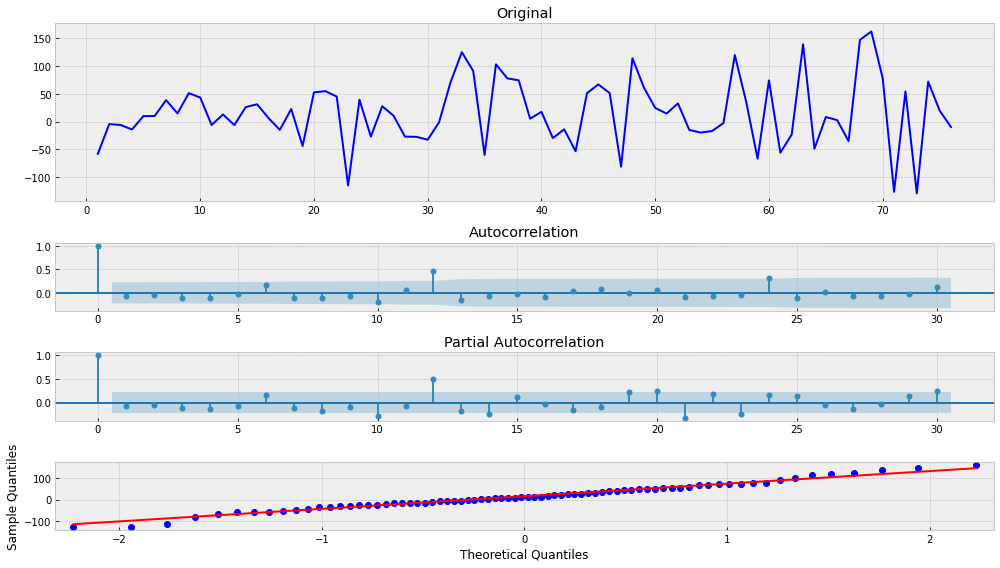

In [5]:
%%time

best_aic_sales = np.inf 
best_order_sales = None
best_mdl_sales = None

for i in range(10):
    for d in range(10):
        for j in range(10):
            try:
                tmp_mdl = smt.ARIMA(all_series['Sales'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_sales:
                    best_aic_sales = tmp_aic
                    best_order_sales = (i, d, j)
                    best_mdl_sales = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_sales, best_order_sales))

#Проверим остатки ряда
tsplot(best_mdl_sales.resid, lags=30)

In [6]:
print(best_mdl_sales.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                   76
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -423.086
Method:                           mle   S.D. of innovations             60.549
Date:                Tue, 26 Jan 2021   AIC                            858.173
Time:                        17:02:27   BIC                            872.157
Sample:                             1   HQIC                           863.762
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Count     1.3556      0.116     11.730      0.000       1.129       1.582
ar.L2.D.Count    -0.3700      0.199     -1.863      0.062      -0.759       0.019
ar.L3.D.Count    -0.3523      0.117     

2. Ряд Robberies

aic: 1175.90409 | order: (9, 1, 6)
Results of Dickey-Fuller Test:
Test Statistic                -1.125680e+01
p-value                        1.659429e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64
Wall time: 3min 12s


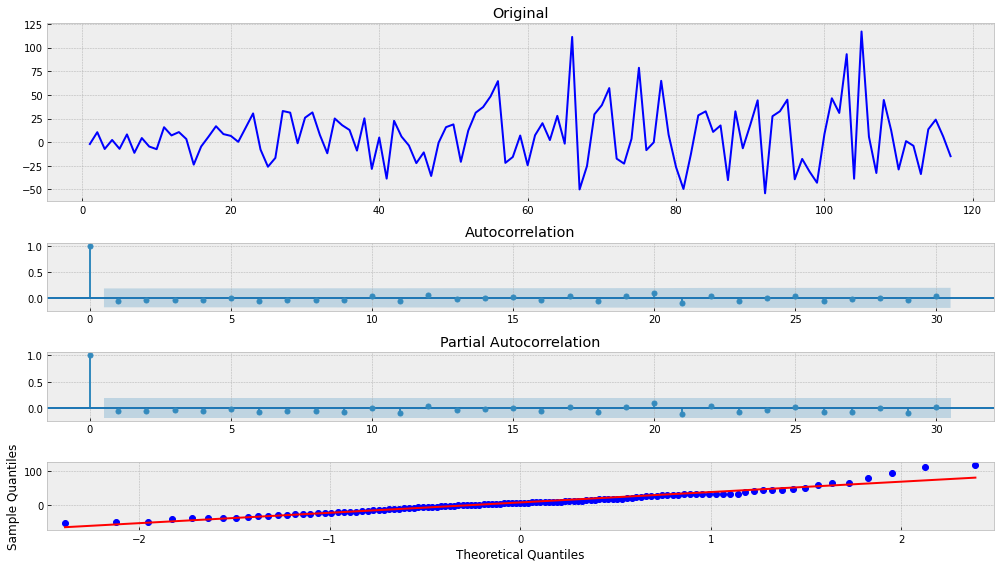

In [11]:
%%time

best_aic_rob = np.inf 
best_order_rob = None
best_mdl_rob = None

for i in range(10):
    for d in range(10):
        for j in range(10):
            try:
                tmp_mdl = smt.ARIMA(all_series['Robberies'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_rob:
                    best_aic_rob = tmp_aic
                    best_order_rob = (i, d, j)
                    best_mdl_rob = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_rob, best_order_rob))


tsplot(best_mdl_rob.resid, lags=30)

In [12]:
print(best_mdl_rob.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                  117
Model:                 ARIMA(9, 1, 6)   Log Likelihood                -571.952
Method:                           mle   S.D. of innovations             30.903
Date:                Tue, 26 Jan 2021   AIC                           1175.904
Time:                        17:15:48   BIC                           1220.099
Sample:                             1   HQIC                          1193.847
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Count     1.2384      0.402      3.079      0.002       0.450       2.027
ar.L2.D.Count    -1.5873      0.655     -2.422      0.015      -2.872      -0.303
ar.L3.D.Count     1.1137      0.801     

3. Ряд Temperature

aic: 1126.23593 | order: (7, 1, 7)
Results of Dickey-Fuller Test:
Test Statistic                -1.482266e+01
p-value                        1.952883e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
Wall time: 6min 27s


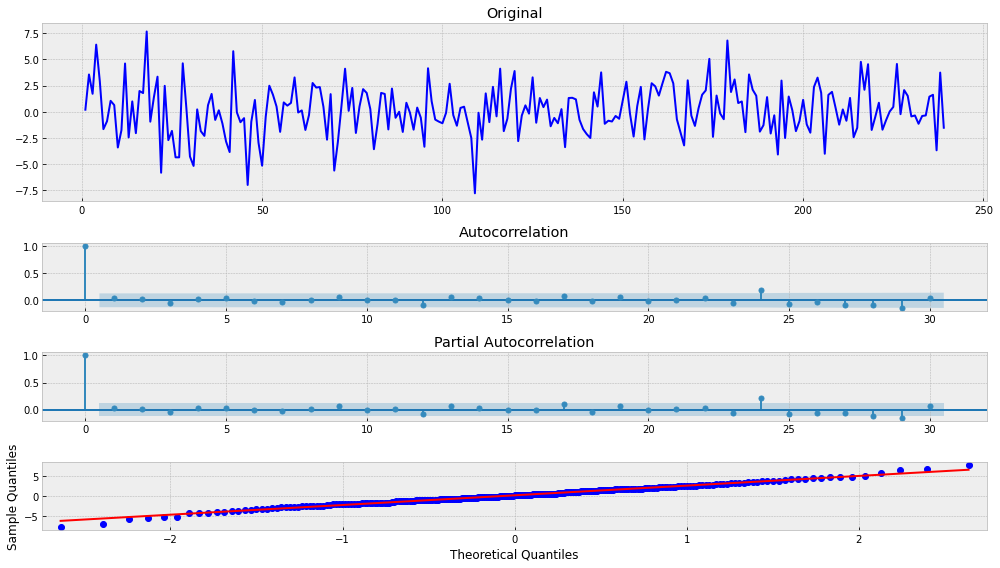

In [13]:
%%time

best_aic_temp = np.inf 
best_order_temp = None
best_mdl_temp = None

for i in range(10):
    for d in range(10):
        for j in range(10):
            try:
                tmp_mdl = smt.ARIMA(all_series['Temperature'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_temp:
                    best_aic_temp = tmp_aic
                    best_order_temp = (i, d, j)
                    best_mdl_temp = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_temp, best_order_temp))


tsplot(best_mdl_temp.resid, lags=30)

In [14]:
print(best_mdl_temp.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.Deg   No. Observations:                  239
Model:                 ARIMA(7, 1, 7)   Log Likelihood                -548.118
Method:                           mle   S.D. of innovations              2.332
Date:                Tue, 26 Jan 2021   AIC                           1126.236
Time:                        17:30:51   BIC                           1178.383
Sample:                             1   HQIC                          1147.250
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.Deg     0.8505      0.031     27.606      0.000       0.790       0.911
ar.L2.D.Deg     0.5152      0.025     20.450      0.000       0.466       0.565
ar.L3.D.Deg    -1.7519      0.065    -27.116    

4. Ряд Dow_Jones

aic: 1416.27670 | order: (2, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                -1.184569e+01
p-value                        7.408781e-22
#Lags Used                     0.000000e+00
Number of Observations Used    1.590000e+02
Critical Value (1%)           -3.472161e+00
Critical Value (5%)           -2.879895e+00
Critical Value (10%)          -2.576557e+00
dtype: float64
Wall time: 20min 37s


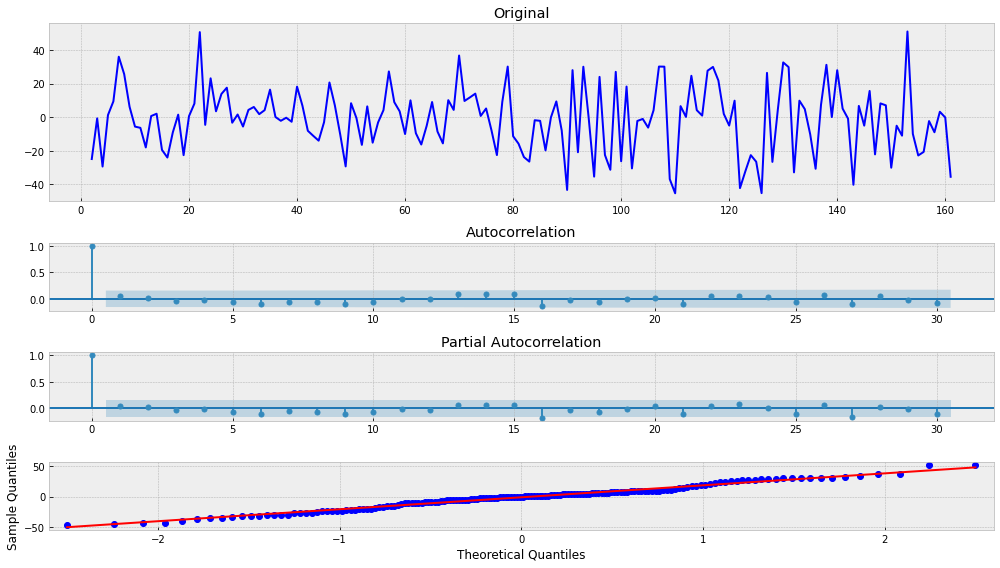

In [15]:
%%time

best_aic_dj = np.inf 
best_order_dj = None
best_mdl_dj = None

for i in range(10):
    for d in range(10):
        for j in range(10):
            try:
                tmp_mdl = smt.ARIMA(all_series['Dow_Jones'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_dj:
                    best_aic_dj = tmp_aic
                    best_order_dj = (i, d, j)
                    best_mdl_dj = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_dj, best_order_dj))


tsplot(best_mdl_dj.resid, lags=30)

In [16]:
print(best_mdl_dj.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  160
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -702.138
Method:                           mle   S.D. of innovations             19.208
Date:                Tue, 26 Jan 2021   AIC                           1416.277
Time:                        18:08:33   BIC                           1434.728
Sample:                             2   HQIC                          1423.769
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D2.Close    -1.5987      0.051    -31.044      0.000      -1.700      -1.498
ar.L2.D2.Close    -0.9299      0.059    -15.824      0.000      -1.045      -0.815
ma.L1.D2.Close     0.5837      0.079

5. Ряд Births

aic: 2452.86209 | order: (3, 1, 4)
Results of Dickey-Fuller Test:
Test Statistic                -1.820621e+01
p-value                        2.398998e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.630000e+02
Critical Value (1%)           -3.448494e+00
Critical Value (5%)           -2.869535e+00
Critical Value (10%)          -2.571029e+00
dtype: float64
Wall time: 9min 23s


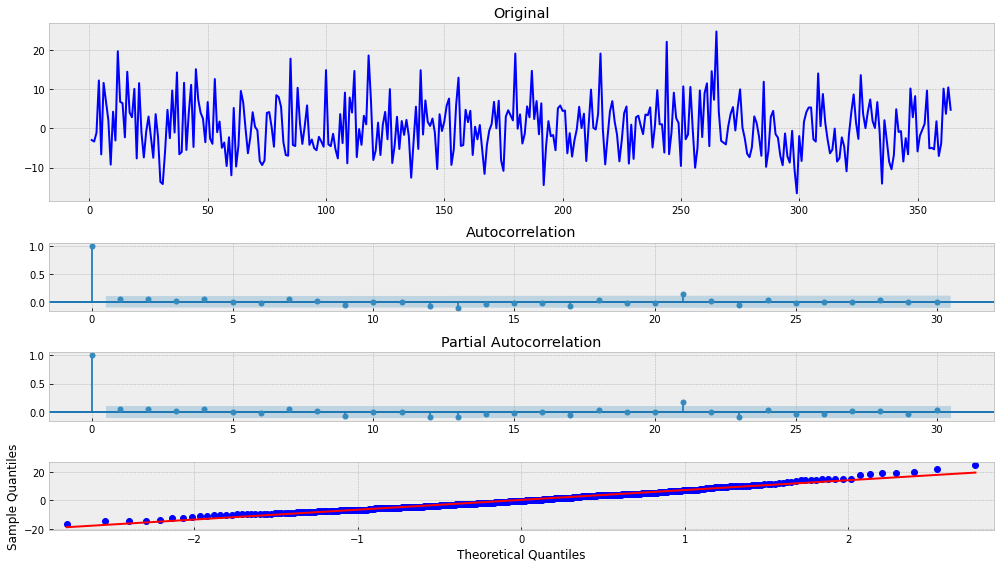

In [17]:
%%time

best_aic_b = np.inf 
best_order_b = None
best_mdl_b = None

for i in range(10):
    for d in range(10):
        for j in range(10):
            try:
                tmp_mdl = smt.ARIMA(all_series['Births'], order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_b:
                    best_aic_b = tmp_aic
                    best_order_b = (i, d, j)
                    best_mdl_b = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_b, best_order_b))


tsplot(best_mdl_b.resid, lags=30)

In [18]:
print(best_mdl_b.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                  364
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -1218.431
Method:                           mle   S.D. of innovations              6.793
Date:                Tue, 26 Jan 2021   AIC                           2452.862
Time:                        18:30:52   BIC                           2484.039
Sample:                             1   HQIC                          2465.254
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Count     0.2798      0.016     17.446      0.000       0.248       0.311
ar.L2.D.Count     0.2036      0.019     10.616      0.000       0.166       0.241
ar.L3.D.Count    -0.9607      0.015    -